# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

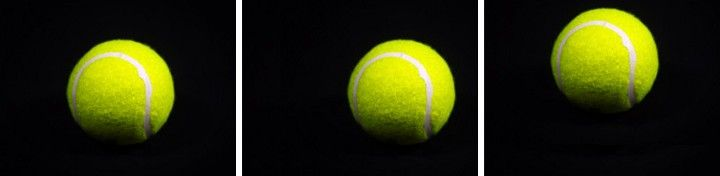



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [105]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


First we upload an image from the internet

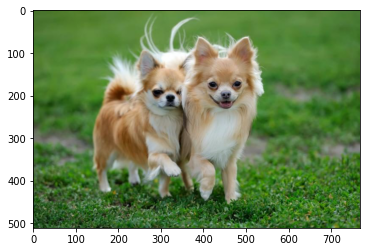

In [106]:
url = 'https://www.zooplus.es/magazine/wp-content/uploads/2019/03/Chihuahua-768x511.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


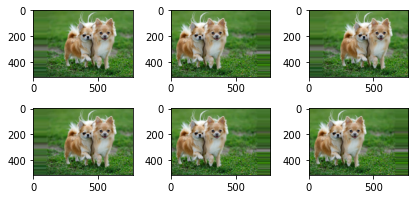

In [120]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample 
samples = expand_dims(data, 0)
# We created the data booster using just makeover
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and show the results
for i in range(6):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #converts to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

This factor is called rescale: rescaling factor
(rescale=0./100)

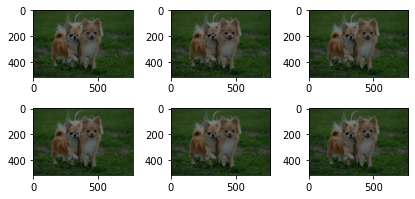

In [121]:
datagen = ImageDataGenerator(rescale=50./100)
it = datagen.flow(samples, batch_size= 1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means inverting rows or columns of pixels in the case of a vertical or horizontal rotation, respectively. The increment is specified by a **horizontal_flip** or **vertical_flip** Boolean argument to the **ImageDataGenerator** class.

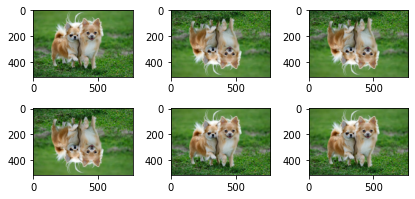

In [122]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled evenly randomly from the zoom region for each dimension (width, height) separately. <br> <br> Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom range, 1 zoom range]

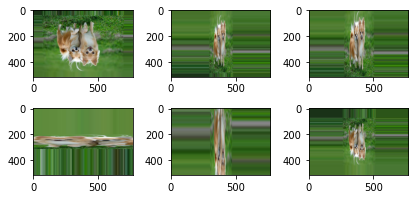

In [123]:
datagen = ImageDataGenerator(zoom_range=4.2) #float o Rango [100,100]
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise by a certain number of degrees from 0 to 360. You may rotate pixels outside the image frame and leave areas of the frame without pixel data, which need to be completed.

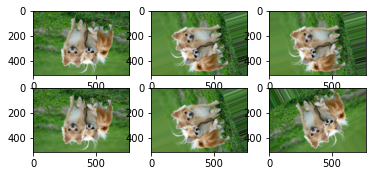

In [124]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

**horizontal flip**
horizontal_flip: Boolean. Randomly flip inputs horizontally.
in this case is not necesary because te image is in horizontally form, bot i decide puts like example

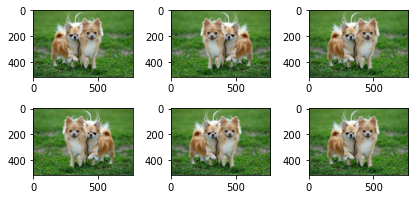

In [125]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**Validation split**
validation_split :Fraction of images reserved for validation (strictly between 0 and 1).

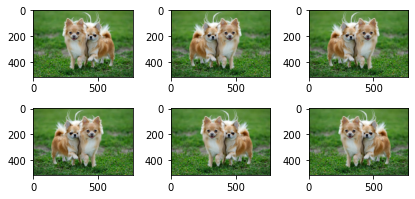

In [113]:
Datagen = ImageDataGenerator(validation_split=0.8)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**sher_range**
shear_range:  Shear Intensity (Shear angle in counter-clockwise direction in degrees)

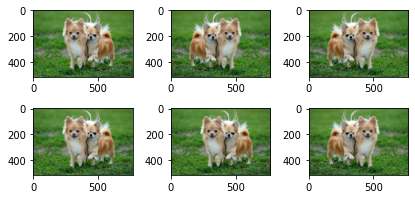

In [114]:
Datagen = ImageDataGenerator(shear_range=5.8)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**cval**
cval: Float or Int. Value used for points outside 

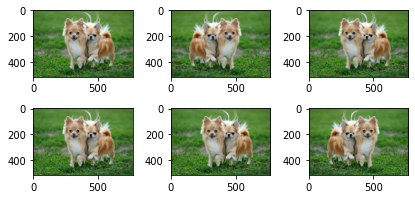

In [115]:
Datagen = ImageDataGenerator(cval=0.9)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**channel_shift_range**
channel_shift_range: Float. Range for random channel shifts.

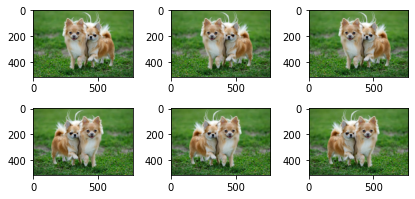

In [116]:
Datagen = ImageDataGenerator(channel_shift_range=0.7)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**preprocessing_function**
preprocessing_function: function that will be applied on each input. The function will run after the image is resized and augmented

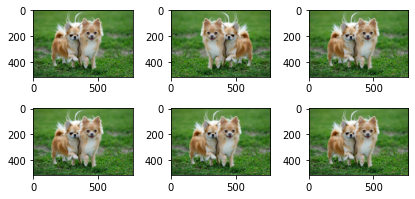

In [119]:
Datagen = ImageDataGenerator(preprocessing_function=23)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many works an increase of data is used to increase the amount of training images and improve the precision of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

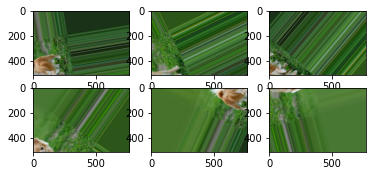

In [126]:
datagen = ImageDataGenerator(
            rotation_range               = 100,
            width_shift_range            = [300,300],   
            height_shift_range           = [350,350],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the work needed is not so simple given the inherent complexity of language (we cannot replace each word with its synonym and even if we do, we run the risk that the meaning of prayer will change completely. <br> There are some libraries that can help us do this, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on increasing data.

In [148]:
!pip install textattack

In [149]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [150]:
text = "Always pray to have eyes that see the best in people, A heart thar forgives the worst, A mind that forgest the bad, and a soul that never loses faith in God"

TextAttack provides us with four methods for increasing data.


## WordNetAugmenter
Enlarges the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet is superficially similar to a thesaurus, because it groups words according to their meaning.



In [151]:
aug = WordNetAugmenter();
aug.augment(text)

["Always pray to have eyes that see the best in people, a heart thar forgives the defective, A mind that forgest the bad, and a soul that ne'er loses faith in God"]


## EmbeddingAugmenter
Increases text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8


In [152]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Steadily pray to have eyes that see the best in people, A heart thar forgives the gravest, A mind that forgest the bad, and a soul that never loses faith in Christ']

## CharSwapAugmenter
Increases text by replacing, deleting, inserting, and exchanging adjacent characters

In [153]:
aug = CharSwapAugmenter()
aug.augment(text)

['Always pray to have eyes that Gsee the best in people, A heart thar forgives the worst, A mind that ofrgest the bad, and a soul that never olses faith in God']


## EasyDataAugmenter
This increases the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym inserts. All of these 4 functionalities occur randomly. Then we will get different results each time we execute the code. This returns 4 increased results, unlike the other methods.


In [154]:
aug = EasyDataAugmenter()
aug.augment(text)

['Always angstrom pray to have eyes that god see the best in people cause, A heart thar forgives the worst, A mind that forgest the bad, and a soul that never loses faith in God',
 'Always pray to have eyes that see the best in people, A heart thar forgives the worst, a that that forgest the bad, and A soul mind never loses faith in God',
 'Always pray to have eyes that see best in people, A heart thar forgives worst, A mind that forgest the bad, and a soul that never faith in God',
 'Always pray to have eyes that figure the best in people, A heart thar forgives the worst, ampere mind that forgest the tough, and a soul that never loses faith in God']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the translate () method are:

**src:** Source language This parameter is optional because gogletrans will detect it.

**dest:** target language. Parameter required.

**text:** the text to be translated from the source language to the target language. Parameter required.

**Text:** The text to be translated from the source language to the target language. Required parameter.

By using this method what happens is a retranslation, we move from the original language to a target language and then back to the original, during this retrotranslation, there is a slight change in the sentence between the original text and the retrotranslated text, but the general meaning of prayer is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a problem of trial and error.

Some examples of languages:


*   Afrikáans	'af'

*   Chinese (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latín	'la'


*   Spanish	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [135]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 972kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=5f52ac30fe0431bea9192631ed346c26d368fce2c1e732865387c47622a5f600
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=43e19579c416b3662f899ae01a6529a48c417c0c0466fb8417a18d7f87e77a0a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [155]:
from googletrans import Translator
translator = Translator()

In [156]:
origin_text = "All you need is God."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='km').text
print(origin_text)
print(text_trans)
print(final)

All you need is God.
Omnes opus est Dei.
អ្វីដែលពួកគេត្រូវការគឺព្រះ។


In [157]:
origin_text = "God is in control and his timing is perfect."
text_trans = translator.translate(text=origin_text, dest='ko').text
final=translator.translate(text=text_trans, dest='ru').text
print(origin_text)
print(text_trans)
print(final)

God is in control and his timing is perfect.
하나님은 통제하십니다. 그의 타이밍은 완벽합니다.
Бог контролирует. Его время идеальное.


In [158]:
origin_text = "If god is all you have, you have all you need."
text_trans = translator.translate(text=origin_text, dest='it').text
final=translator.translate(text=text_trans, dest='ja').text
print(origin_text)
print(text_trans)
print(final)

If god is all you have, you have all you need.
Se Dio è tutto ciò che hai, hai tutto ciò di cui hai bisogno.
神があなたが持っているすべてであるならば、あなたはあなたが必要とするすべてを持っています。


In [ ]:
origin_text = "Never losses faith."
text_trans = translator.translate(text=origin_text, dest='fy').text
final=translator.translate(text=text_trans, dest='gl').text
print(origin_text)
print(text_trans)
print(final)

In [159]:
origin_text = "Always believe in God."
text_trans = translator.translate(text=origin_text, dest='fy').text
final=translator.translate(text=text_trans, dest='gl').text
print(origin_text)
print(text_trans)
print(final)

Always belive in God.
Leauwe altyd yn God.
Crer sempre en Deus.


In [160]:
origin_text = "Blackpink in your area "
text_trans = translator.translate(text=origin_text, dest='et').text
final=translator.translate(text=text_trans, dest='haw').text
print(origin_text)
print(text_trans)
print(final)

Blackpink in your area 
Blackpink teie piirkonnas
ʻO Blackpink i kou wahi


In [161]:
origin_text = "Hi, my name is Cecilia."
text_trans = translator.translate(text=origin_text, dest='fr').text
final=translator.translate(text=text_trans, dest='ko').text
print(origin_text)
print(text_trans)
print(final)

Hi, my name is Cecilia.
Salut, je m'appelle Cecilia.
안녕하세요, 제 이름은 세실리아입니다.
